In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/MLP_Data.csv")
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data.info

<bound method DataFrame.info of        Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23477       23481         1104   34   
23478       23482          862   48   
23479       23483         1104   31   
23480       23484         1084   28   
23481       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23477                     Great dress for many occasions   
23478              

In [ ]:
data.shape

(23482, 11)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
data.drop(['Title','Review Text','Unnamed: 0','Clothing ID'], axis=1, inplace=True)

In [ ]:
data.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses


In [ ]:
rating = data.groupby('Rating')
rating.mean()

<ipython-input-9-a8d5e27ead50>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating.mean()


,Age,Recommended IND,Positive Feedback Count
Rating,,,
1,43.693587,0.019002,3.459620
2,42.622364,0.060064,3.325879
3,42.158481,0.414141,3.145246
4,42.890640,0.966897,2.403153
5,43.584584,0.998096,2.300023


<ipython-input-11-2b3ff72383e7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


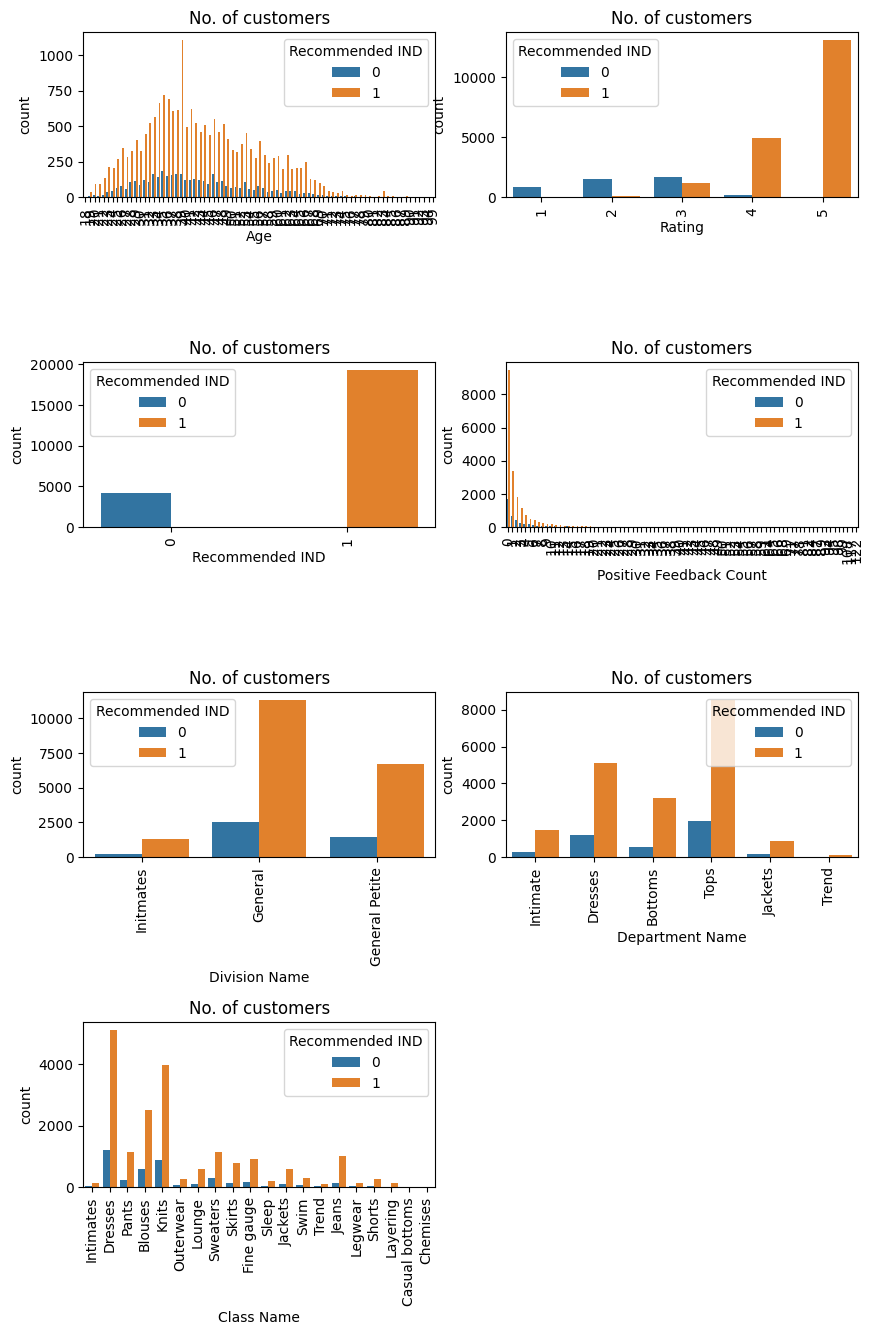

In [ ]:
features=['Age','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data, hue='Recommended IND')
     plt.xticks(rotation=90)
     plt.title("No. of customers")

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['Division Name']=le.fit_transform(data['Division Name'])
data['Department Name']=le.fit_transform(data['Department Name'])
data['Class Name']=le.fit_transform(data['Class Name'])

In [ ]:
# Spliting data into Feature and
X = data.drop(['Recommended IND'],axis=1)
y=data['Recommended IND']

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

X_train.shape

X_test.shape

(7045, 6)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 26)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])})

In [ ]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 8}


In [ ]:
print('KNN_Best: {}'.format(round(knn_best.score(X_test, y_test)*100,2))+'%')

KNN_Best: 91.51%


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(activation='relu', solver='lbfgs', learning_rate='constant', alpha=0.0001, hidden_layer_sizes=(5, 2), random_state=1)
mlp_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

In [ ]:
from sklearn.metrics import accuracy_score
res = mlp_clf.predict(X_test)
res_acc = accuracy_score(y_test, res)
print ('MLP Accuracy : ',format(res_acc*100,'.2f')+'%')

MLP Accuracy :  93.63%


In [ ]:
from sklearn import svm
SVC_rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
print("Accuracy Radial Basis Kernel:", round(SVC_rbf.score(X_test, y_test)*100,2),"%")

Accuracy Radial Basis Kernel: 92.65 %


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(format(log_reg.score(X_test, y_test)*100))

93.71185237757274


In [ ]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(round(knn_best.score(X_test, y_test)*100,2)))
print('SVM: {}'.format(round(SVC_rbf.score(X_test, y_test)*100,2)))
print('log_reg: {}'.format(round(log_reg.score(X_test, y_test)*100,2)))
print ('MLP : ',format(res_acc*100,'.2f')+'%')

knn: 91.51
SVM: 92.65
log_reg: 93.71
MLP :  93.63%


In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('SVC', SVC_rbf), ('log_reg', log_reg),('MLP',mlp_clf)]
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9371185237757275